### Get the HMFs for all sims:

In [2]:
import numpy as np
from gal_goku import hmf as halo_mass_func

narrow= True
merge = False
for fid in ['L2']:
    save_File = f'/scratch/06536/qezlou/Goku/processed_data/HMF/{fid}_hmfs'
    if narrow:
        base_dir = f'/scratch/06536/qezlou/Goku/FOF/{fid}/narrow/'
        save_File += '_narrow'
    else:
        base_dir = f'/scratch/06536/qezlou/Goku/FOF/{fid}/'
    if merge:
        save_File += '.hdf5'
    else:
        save_File +='_no_merge.hdf5'
    print(save_File)
    hmf = halo_mass_func.Hmf()
    hmf.get_all_fof_hmfs(base_dir=base_dir, save_file=save_File, narrow=narrow, merge= merge)
    print(f'fid = {fid} is done!')

[ 000000.00 ]   0: 01-10 17:15  Hmf             INFO     Logger initialized at level: 20
[ 000000.00 ]   0: 01-10 17:15  Hmf             INFO     MPI_COMM_WORLD | size = 1 -- Nbkit COMM | size = 1


## Plot HMFs:

## Comapre fidelities:

2025-01-09 17:12:52.995468: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-09 17:12:53.088435: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2025-01-09 17:12:53.088457: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2025-01-09 17:12:53.115236: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-09 17:12:53.560381: W tensorflow/stream_executor/platform/de

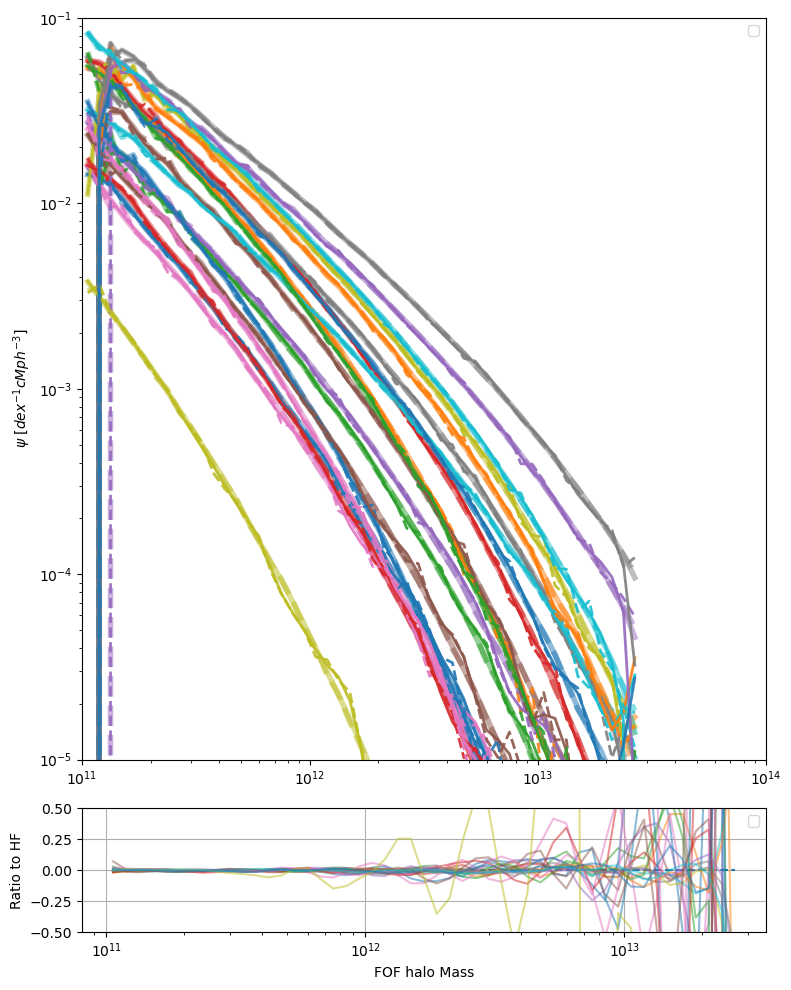

In [1]:
from gal_goku import plot

save_dir = '/home/qezlou/HD2/HETDEX/cosmo/data/HMF'
plt_hmf = plot.PlotHMF(data_dir=save_dir)

plt_hmf.compare_fids(fids=['HF', 'L2'])

## Merged bins:

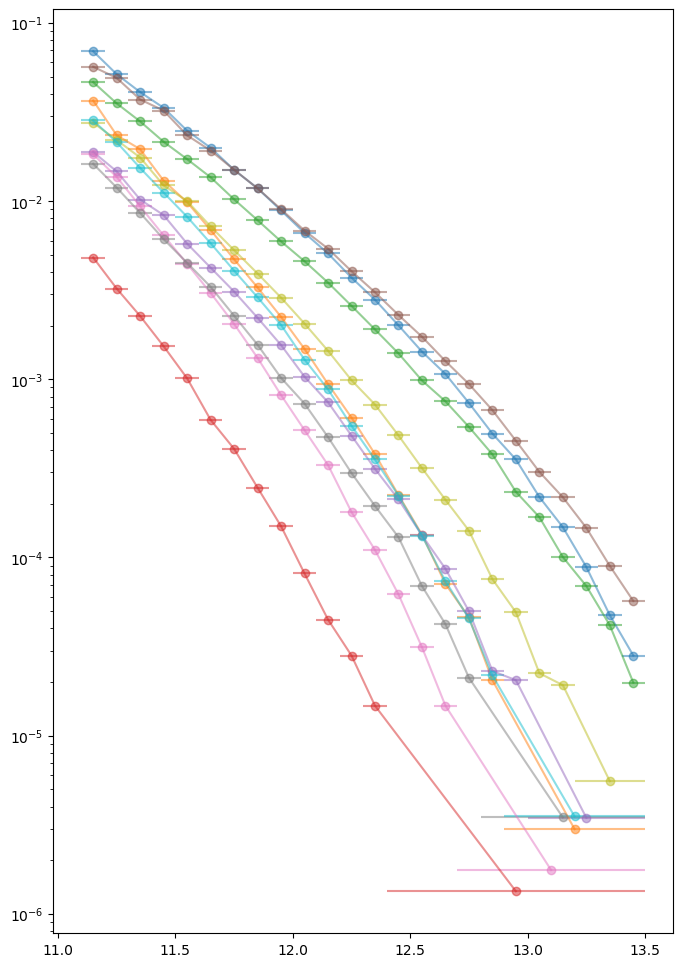

In [26]:
import h5py
import numpy as np
from matplotlib import pyplot as plt

save_file = f'/home/qezlou/HD2/HETDEX/cosmo/data/HMF/merged_bins/L2_hmfs.hdf5'

with h5py.File(save_file, 'r') as f:
    bins = f['bins_coarse'][:]
    hmfs = f['hmfs_coarse'][:]

fig, ax = plt.subplots(figsize=(8, 12))
ind = np.random.choice(len(hmfs), 10, replace=False)
for i in ind:
    mbins = 0.5 * (bins[i][1:] + bins[i][:-1])
    bins_size = bins[i][1:] - bins[i][:-1]
    ax.errorbar(mbins, hmfs[i], xerr=bins_size/2, fmt='o', alpha=0.5, ls='solid')
ax.set_yscale('log')

## Spline interp:

Fix the knots: increasing them

Text(0.5, 0.98, 'Error in the fitting spline, HF, Goku-wide, remove last bins')

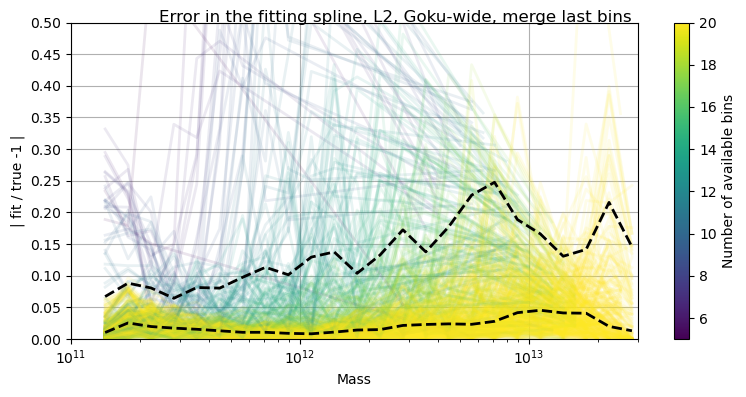

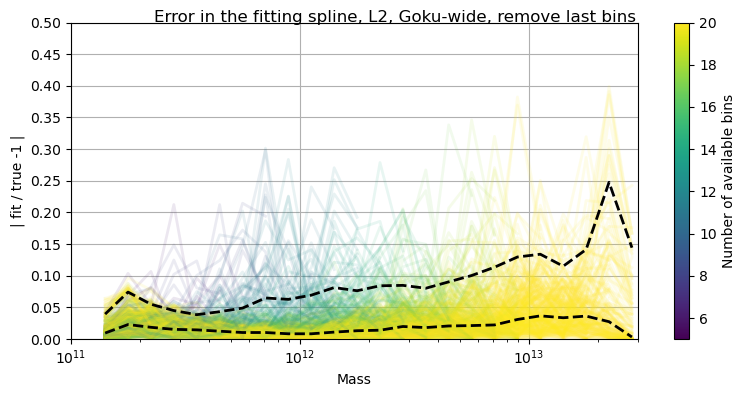

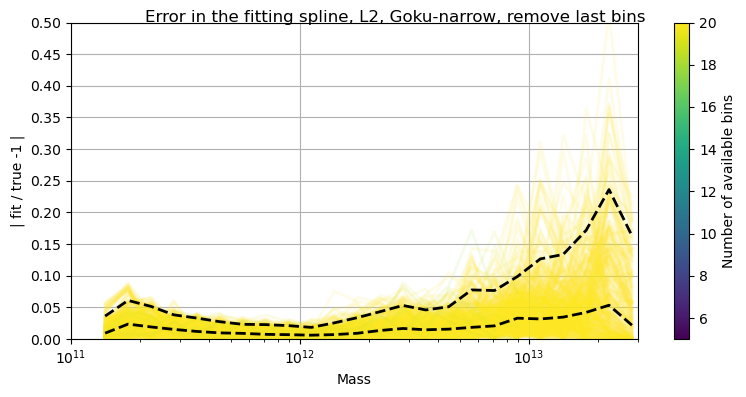

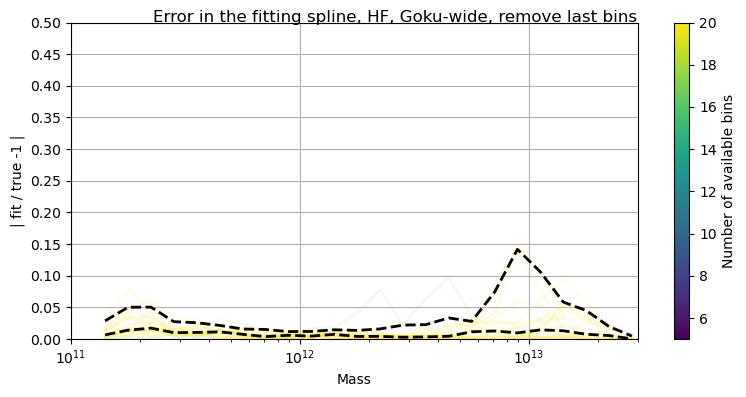

In [ ]:
import numpy as np
from gal_goku import plot

data_dir = '/home/qezlou/HD2/HETDEX/cosmo/data/HMF/'
plt_hmf = plot.PlotHMF(data_dir=data_dir, logging_level='ERROR')
fig, ax = plt_hmf.smoothed_err(['L2'], narrow=False, no_merge=False)
fig.suptitle(f'Error in the fitting spline, L2, Goku-wide, merge last bins')
plt_hmf = plot.PlotHMF(data_dir=data_dir, logging_level='ERROR')
fig, _  = plt_hmf.smoothed_err(['L2'], narrow=False, no_merge=True, save_err_file=f'{data_dir}/spline_err_L2_no_merge.hdf5')
fig.suptitle(f'Error in the fitting spline, L2, Goku-wide, remove last bins')
plt_hmf = plot.PlotHMF(data_dir=data_dir, logging_level='ERROR')
fig, _ = plt_hmf.smoothed_err(['L2'], narrow=True, no_merge=True, save_err_file=f'{data_dir}/spline_err_L2_no_merge.hdf5')
fig.suptitle(f'Error in the fitting spline, L2, Goku-narrow, remove last bins')
plt_hmf = plot.PlotHMF(data_dir=data_dir, logging_level='ERROR')
fig, _ = plt_hmf.smoothed_err(['HF'], no_merge=True)
fig.suptitle(f'Error in the fitting spline, HF, Goku-wide, remove last bins')

## $\chi^2$ fit:

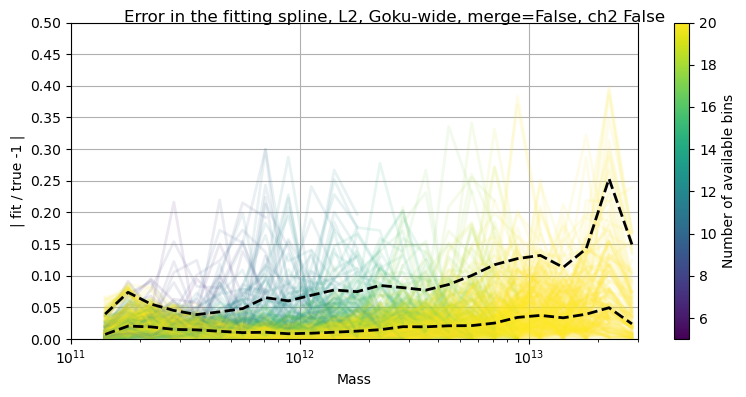

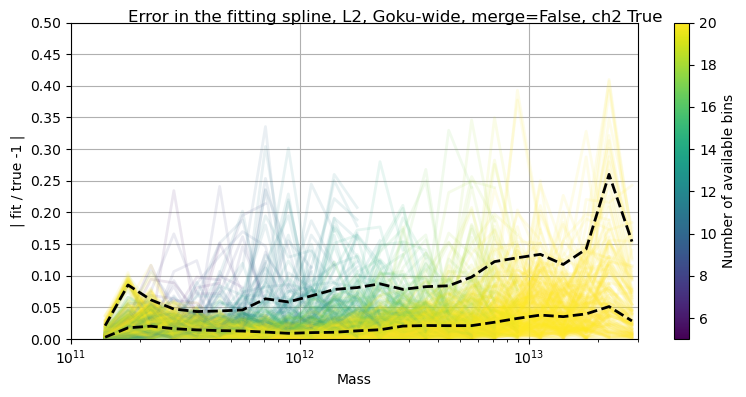

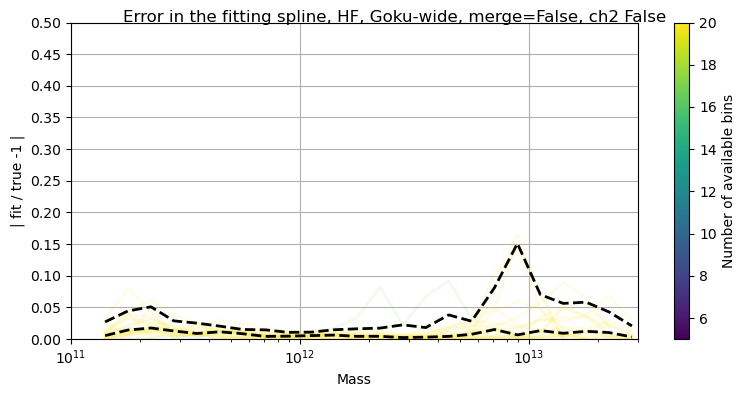

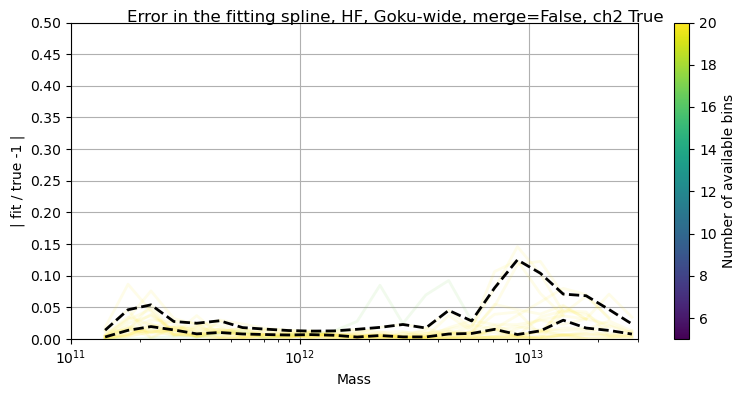

In [4]:
import numpy as np
from gal_goku import plot

data_dir = '/home/qezlou/HD2/HETDEX/cosmo/data/HMF/'
plt_hmf = plot.PlotHMF(data_dir=data_dir, logging_level='ERROR')
no_merge =True
for fid in ['L2', 'HF']:
    for chi2 in [False, True]:
        fig, ax = plt_hmf.smoothed_err([fid], narrow=False, no_merge=no_merge, chi2=chi2)
        fig.suptitle(f'Error in the fitting spline, {fid}, Goku-wide, merge={not no_merge}, ch2 {chi2}')

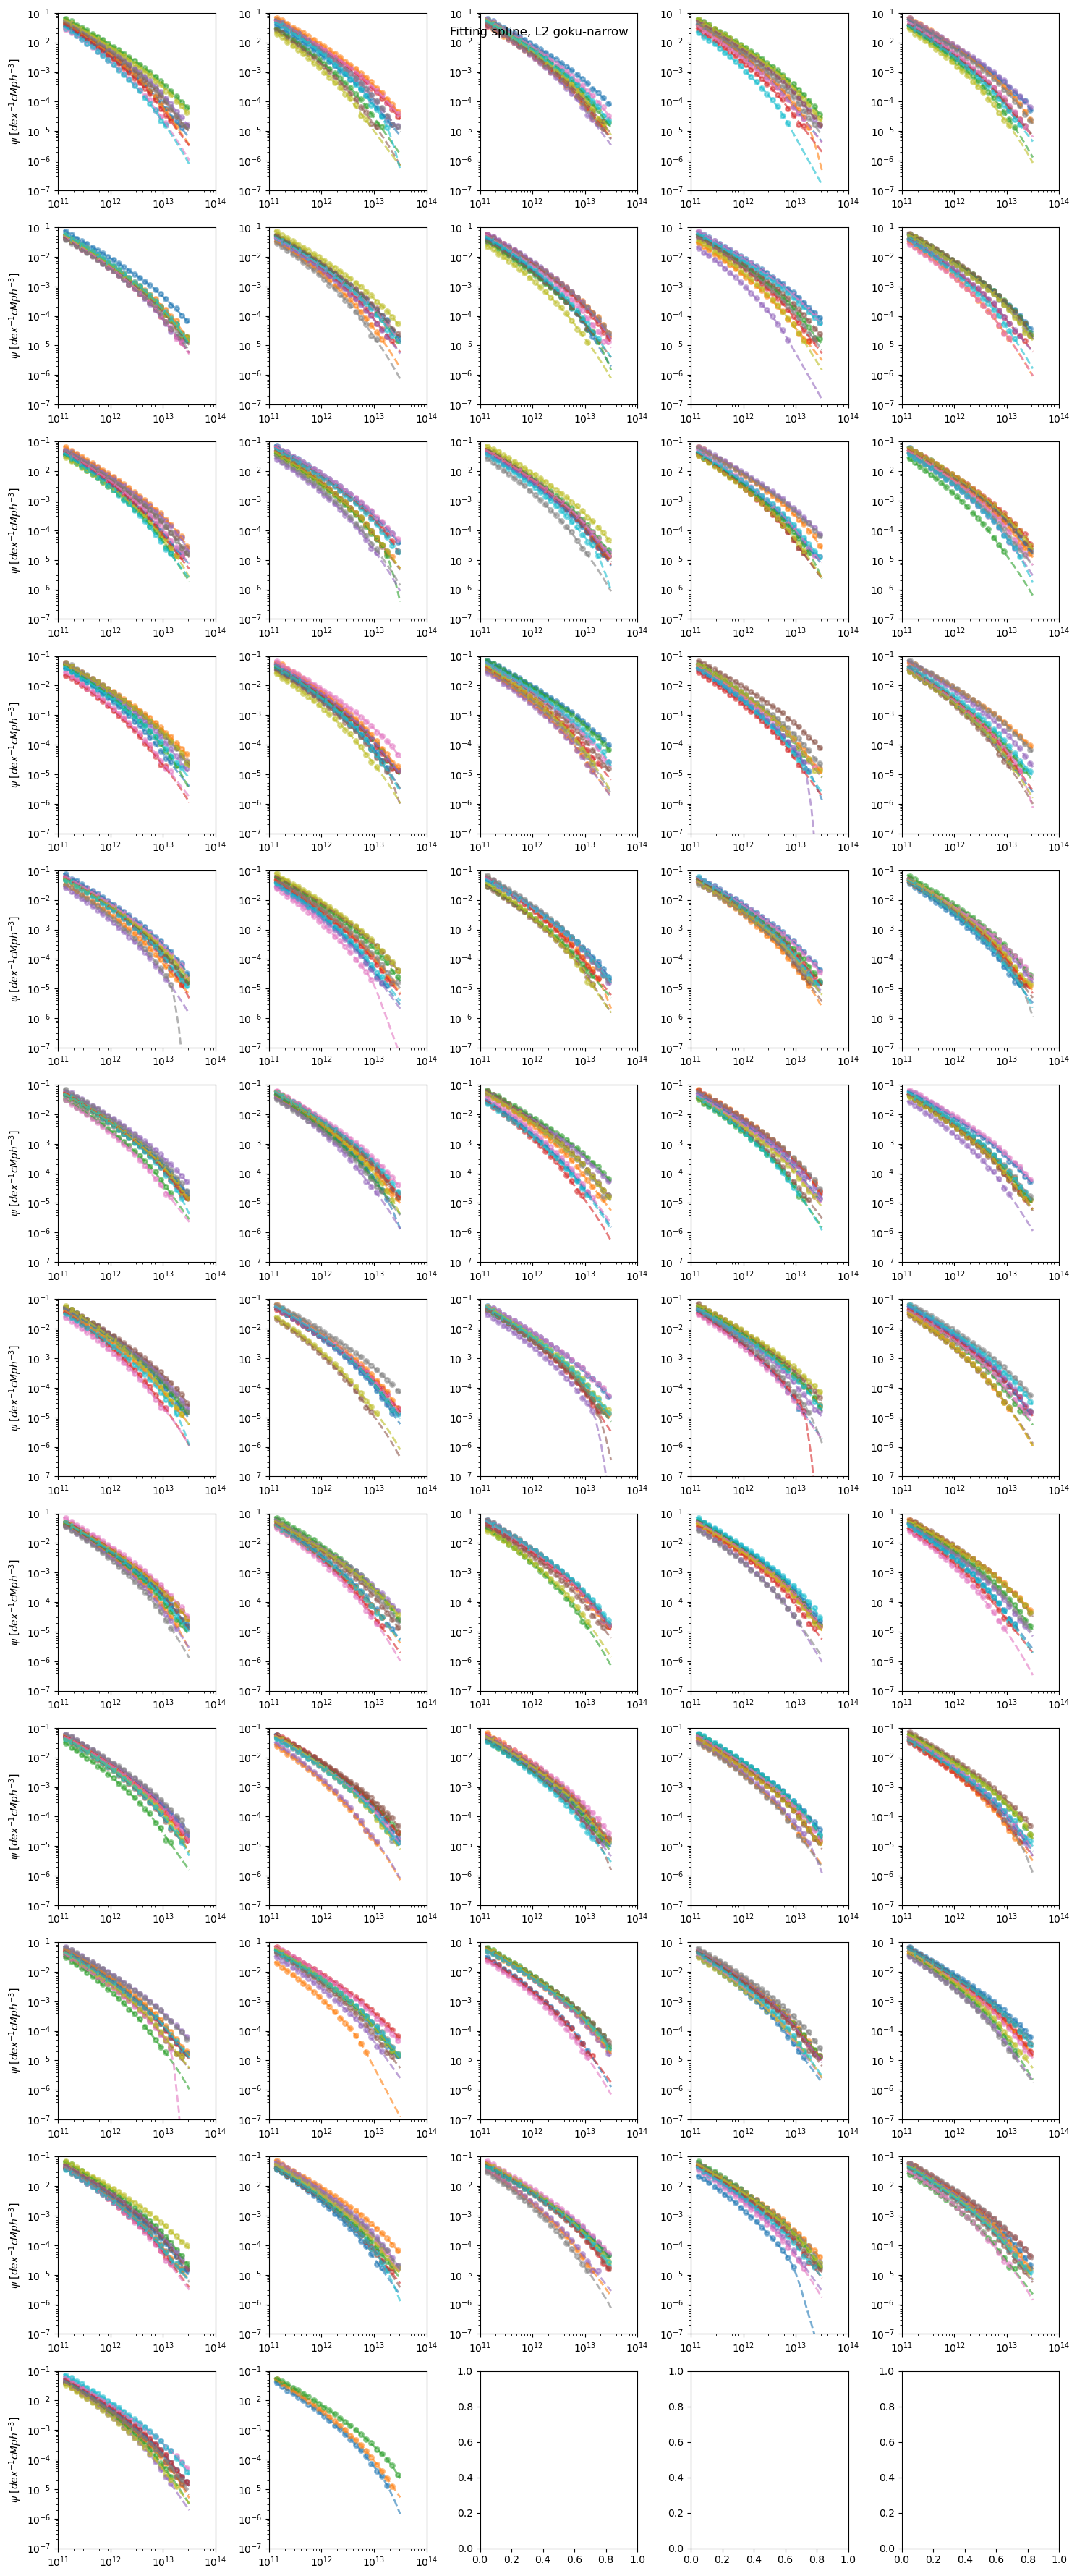

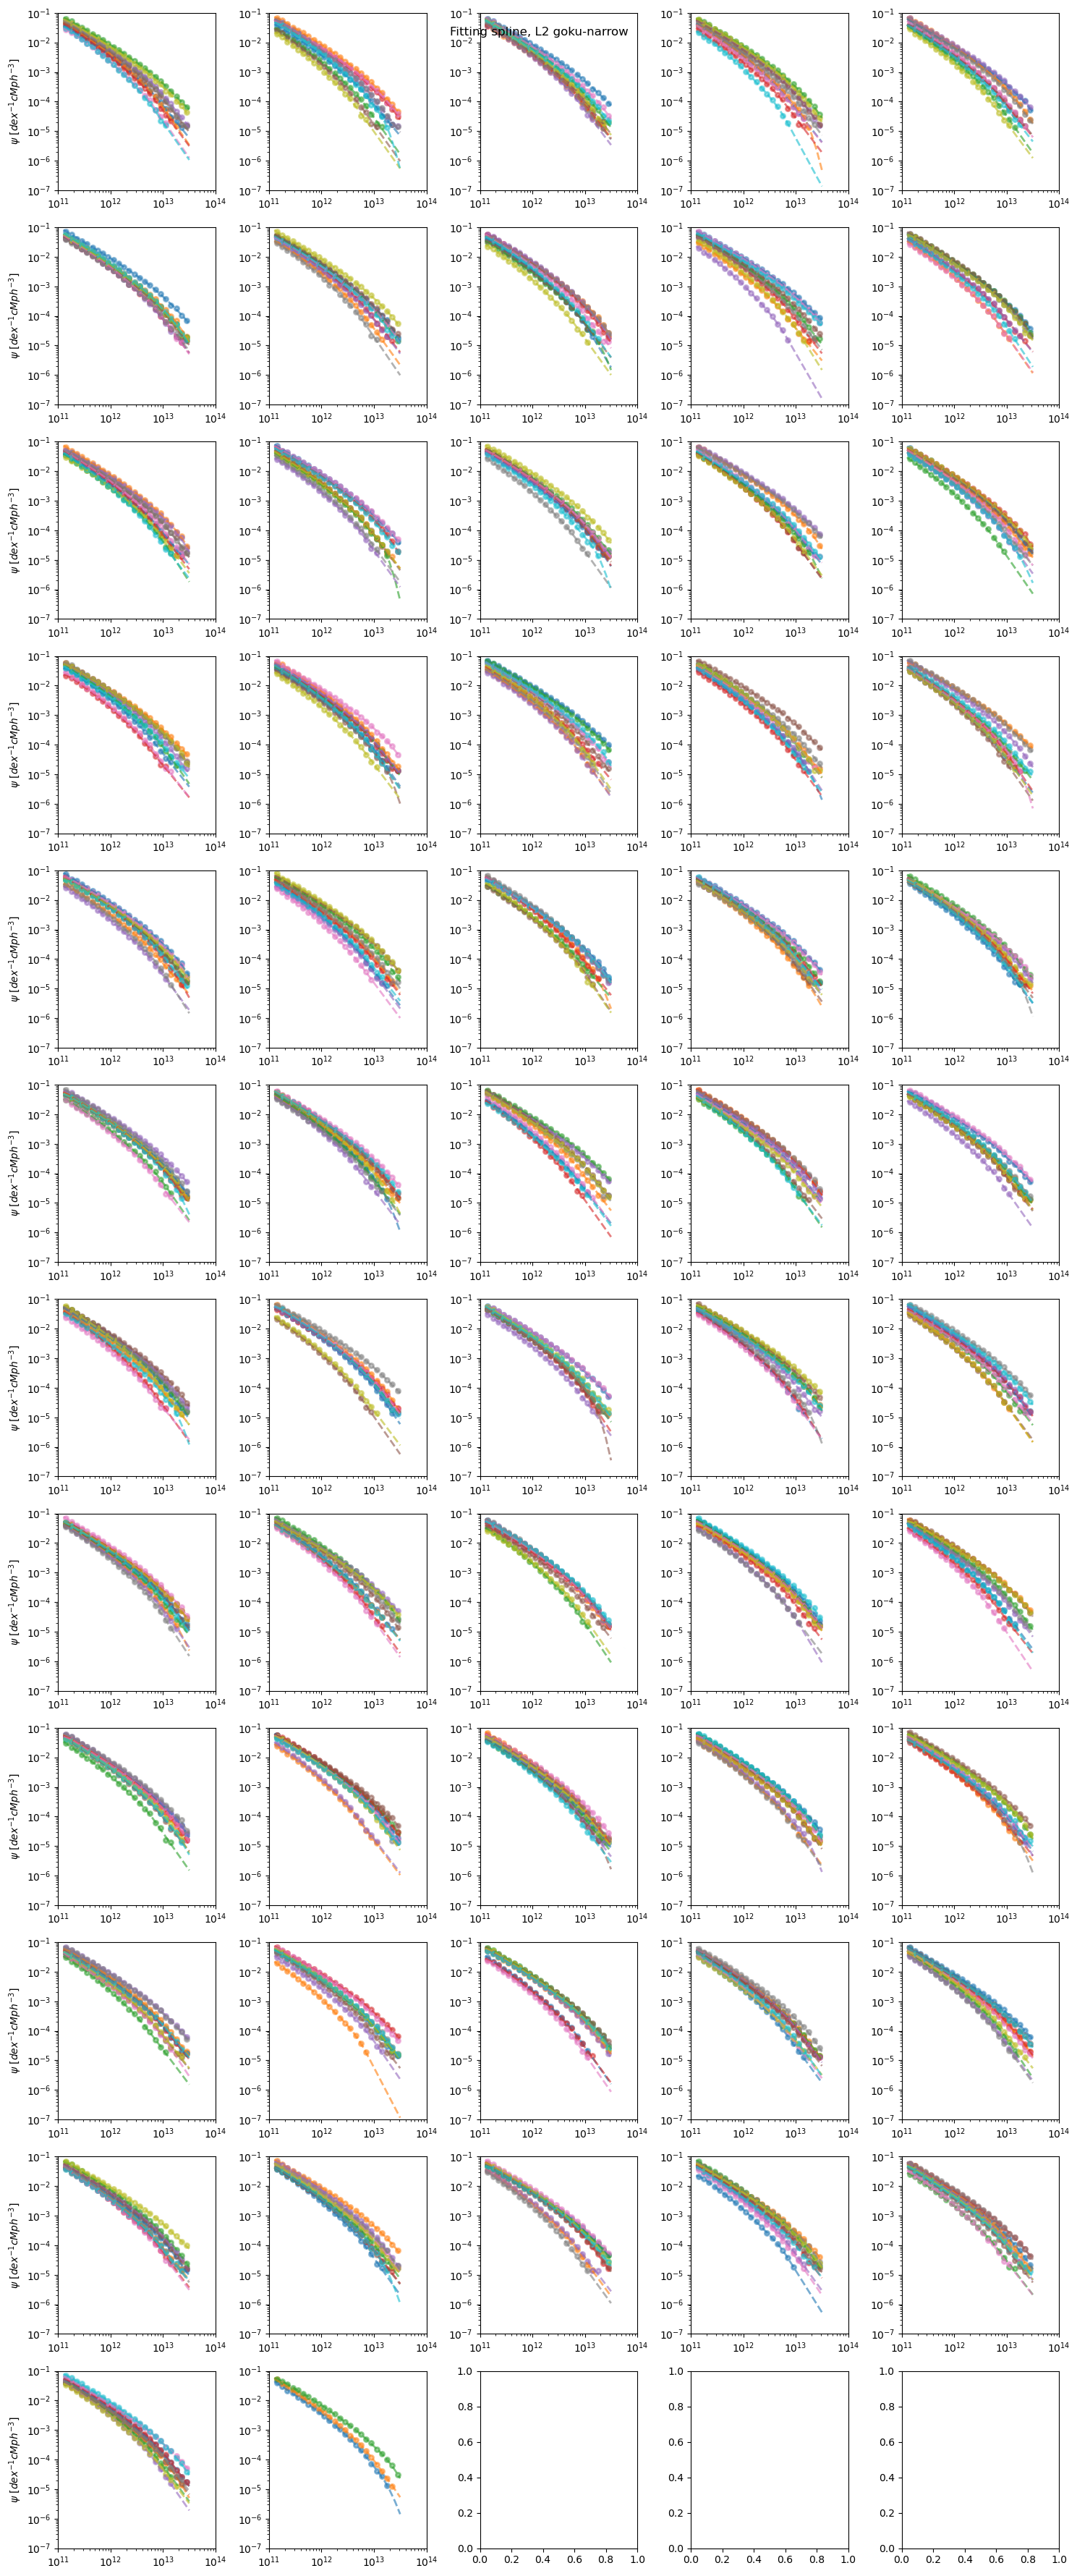

In [3]:
import numpy as np
from gal_goku import plot

data_dir = '/home/qezlou/HD2/HETDEX/cosmo/data/HMF/'
plt_hmf = plot.PlotHMF(data_dir=data_dir)
plt_hmf.smoothed(['L2'], narrow=True, chi2=False)
plt_hmf.smoothed(['L2'], narrow=True, chi2=True)


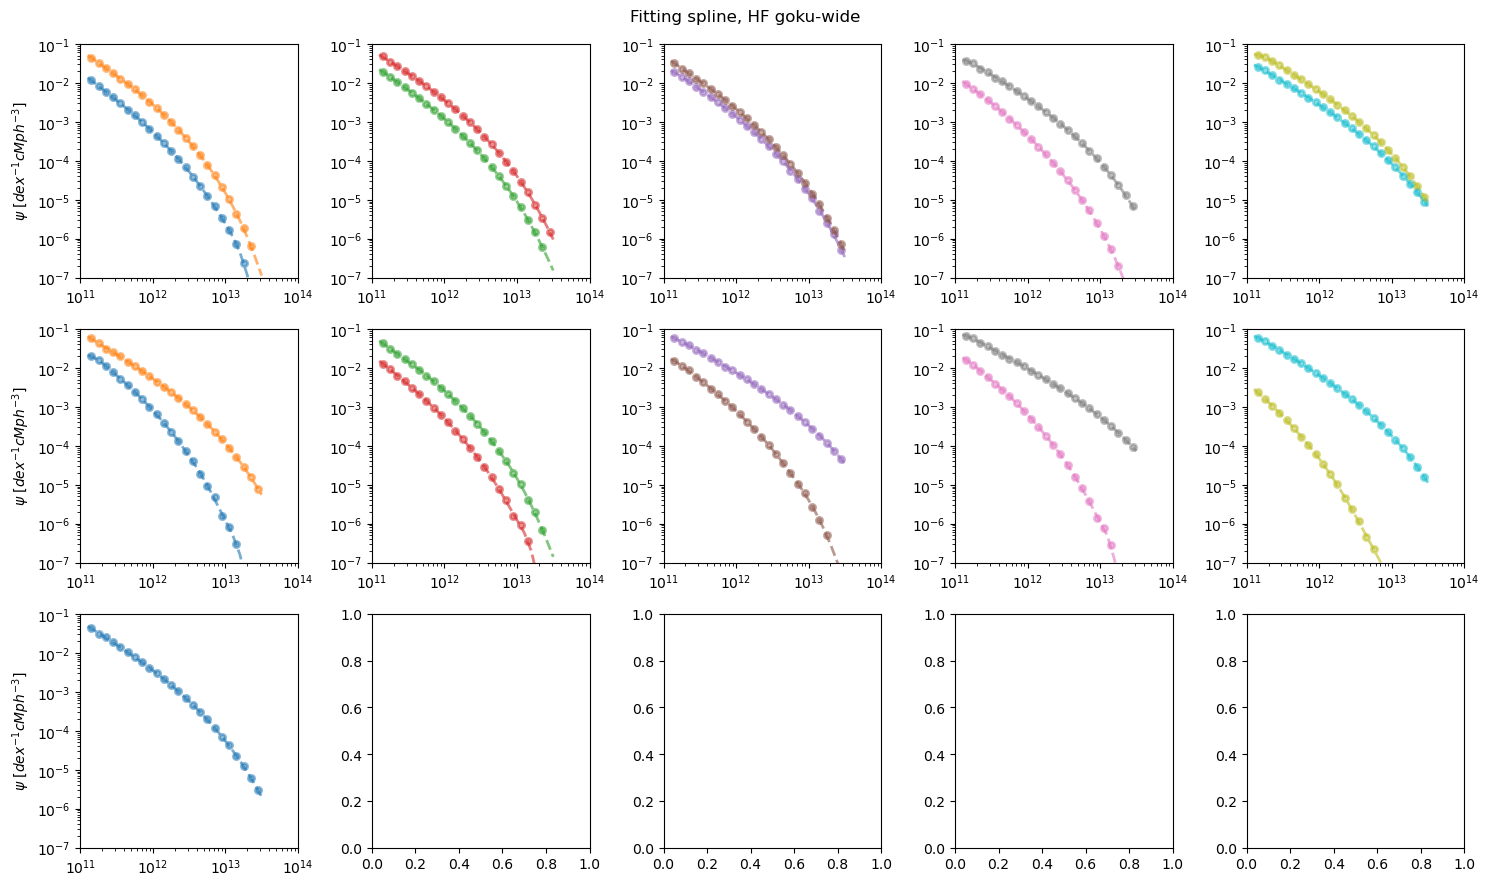

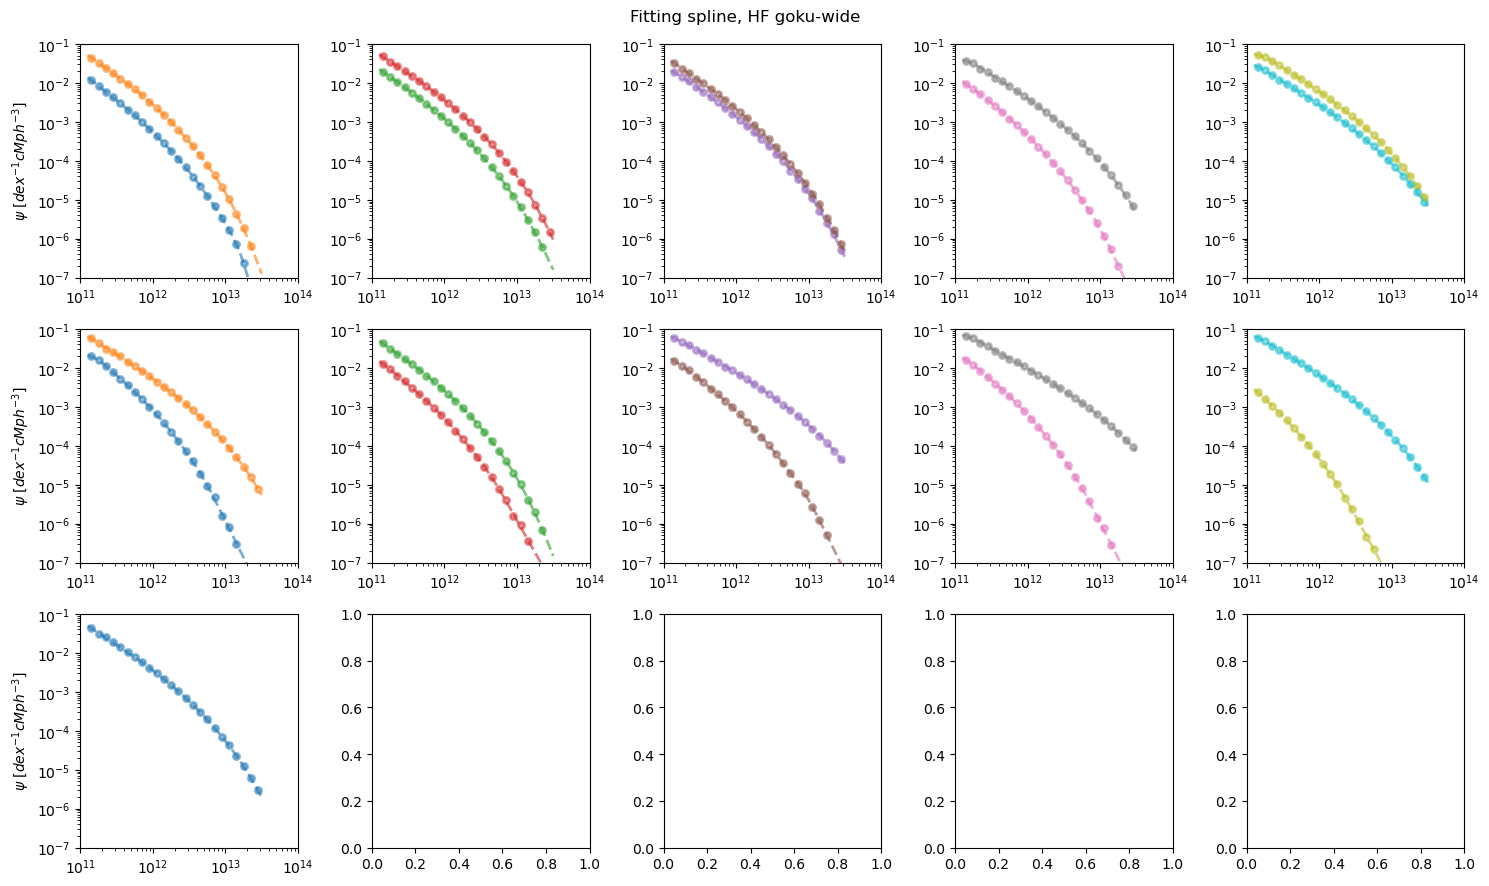

In [5]:
import numpy as np
from gal_goku import plot

data_dir = '/home/qezlou/HD2/HETDEX/cosmo/data/HMF/'
plt_hmf = plot.PlotHMF(data_dir=data_dir)
for chi2 in [False, True]:
    plt_hmf.smoothed(['HF'], narrow=False, per_panel=2, chi2=chi2)

In [1]:
import numpy as np
from gal_goku import plot

data_dir = '/home/qezlou/HD2/HETDEX/cosmo/data/HMF/'
plt_hmf = plot.PlotHMF(data_dir=data_dir)

plt_hmf.compare_fids(no_merge=True, chi2=False)

02/14/2025 11:52:21 AM Found 21 common pairs


RuntimeError: Optimization failed: Inequality constraints incompatible

## Narrow:

02/14/2025 11:45:29 AM Found 15 common pairs


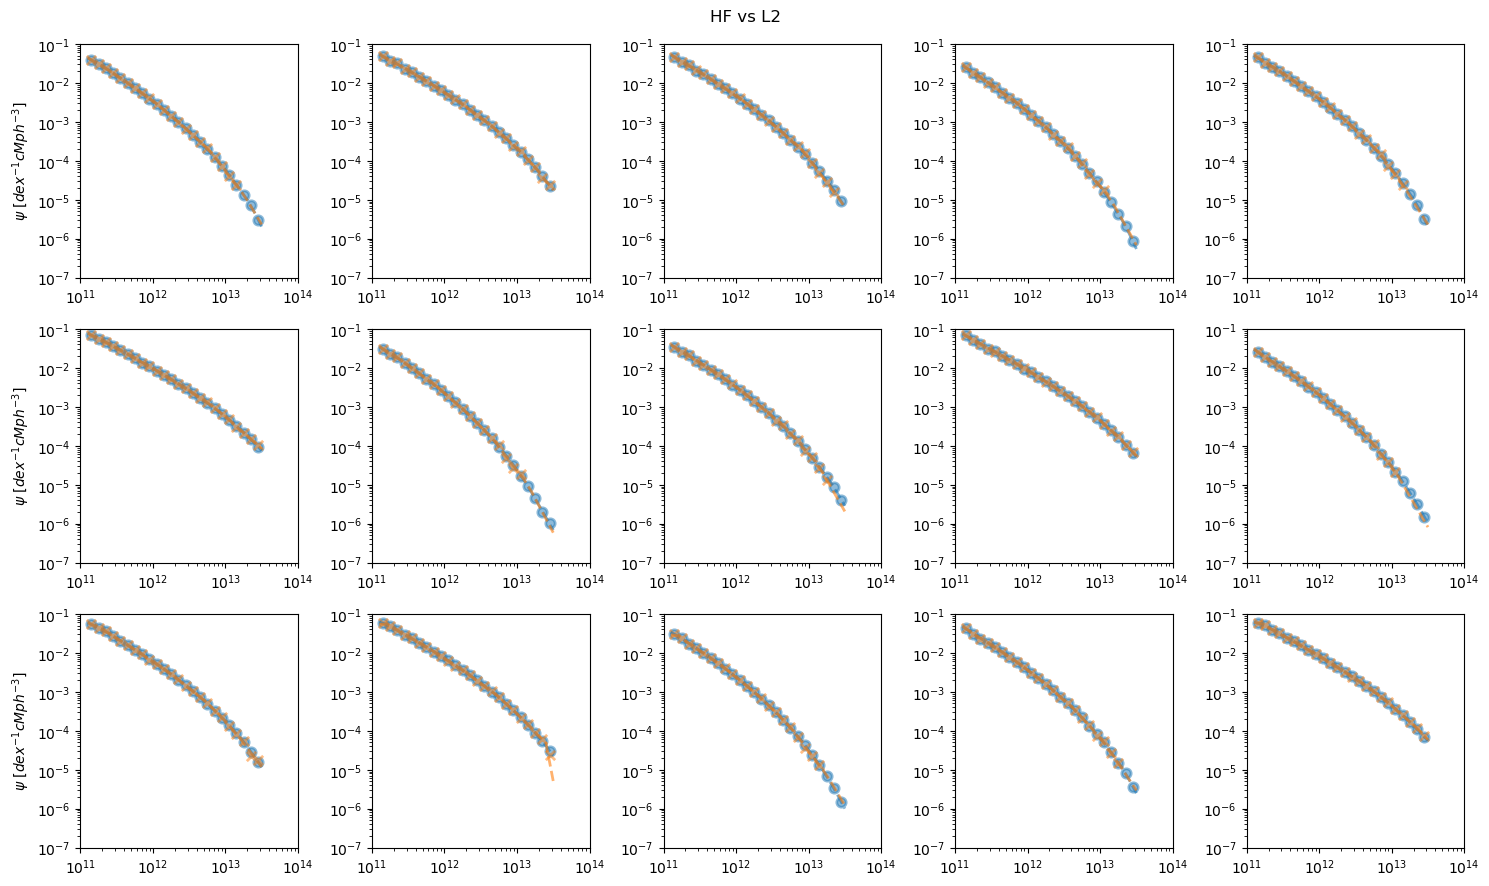

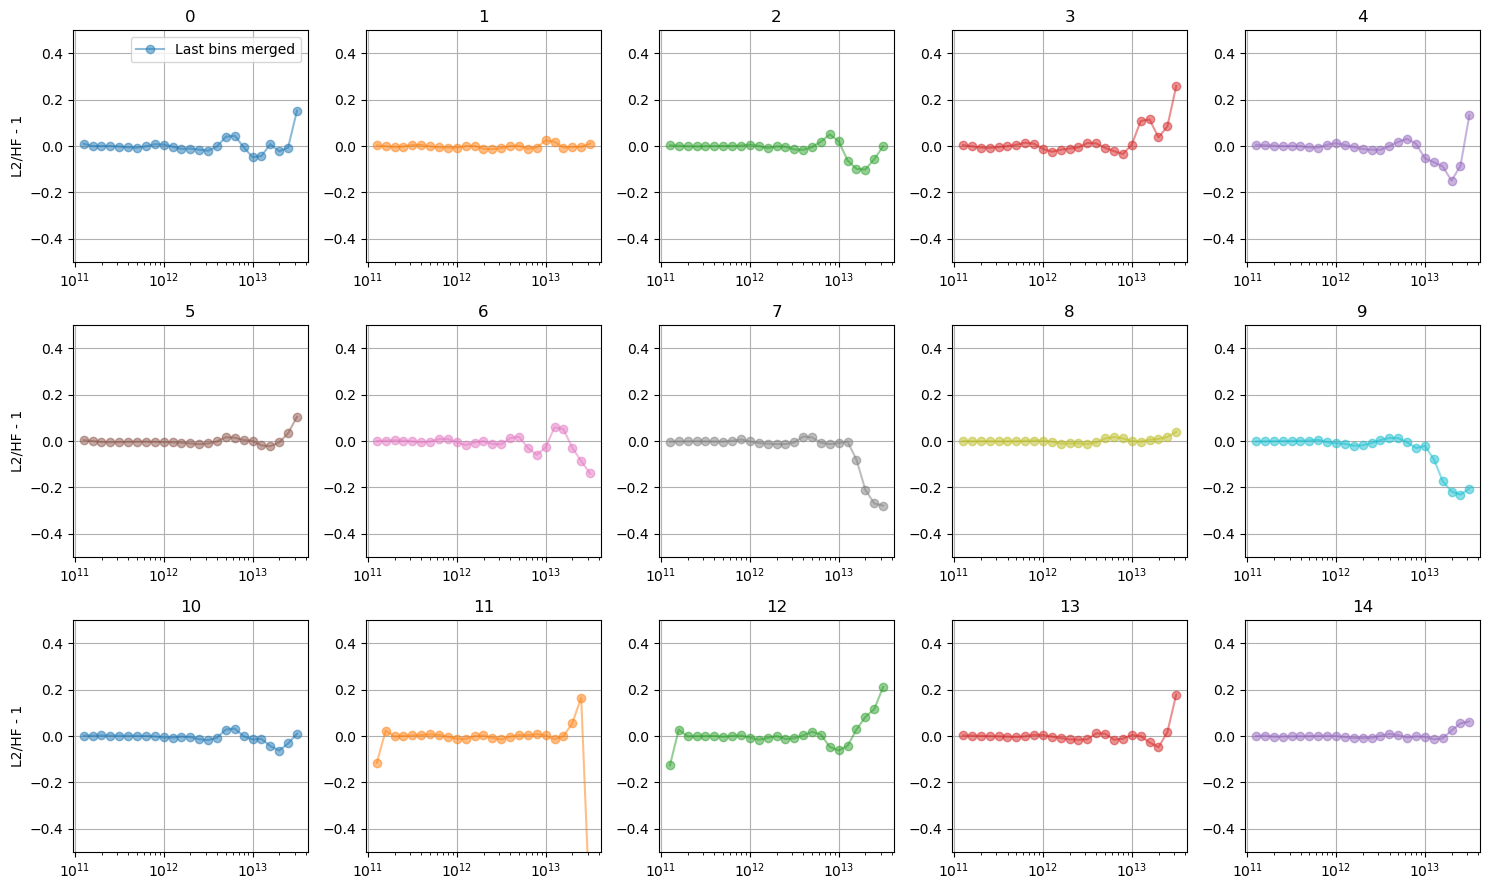

In [1]:
import numpy as np
from gal_goku import plot

data_dir = '/home/qezlou/HD2/HETDEX/cosmo/data/HMF/'
plt_hmf = plot.PlotHMF(data_dir=data_dir)
#for chi2 in [False, True]:
plt_hmf.compare_fids(no_merge=True, chi2=False, narrow=True)

In [1]:
from gal_goku import summary_stats
data_dir = '/home/qezlou/HD2/HETDEX/cosmo/data/HMF/'
halo_fun = summary_stats.HMF(data_dir=data_dir, fid='HF', no_merge=True, chi2=False, narrow=True)
hmfs, bins = halo_fun.load()
len(halo_fun.sim_tags)

15

In [3]:
from gal_goku import summary_stats
data_dir = '/home/qezlou/HD2/HETDEX/cosmo/data/HMF/'
halo_fun = summary_stats.HMF(data_dir=data_dir, fid='HF', no_merge=True, chi2=False, narrow=True)
halo_fun.make_big_ic_file()

BaseStatEmu | 02/14/2025 02:31:25 PM | Rank 0 | INFO  |  number of files in /scratch/06536/qezlou/Goku/FOF/HF/ is 0
BaseStatEmu | 02/14/2025 02:31:25 PM | Rank 0 | INFO  |  number of files in /scratch/06536/qezlou/Goku/FOF/HF/ is 0
BaseStatEmu | 02/14/2025 02:31:25 PM | Rank 0 | INFO  |  number of files in /scratch/06536/qezlou/Goku/FOF/HF/ is 0
BaseStatEmu | 02/14/2025 02:31:25 PM | Rank 0 | INFO  |  number of files in /scratch/06536/qezlou/Goku/FOF/L1/ is 0
BaseStatEmu | 02/14/2025 02:31:25 PM | Rank 0 | INFO  |  number of files in /scratch/06536/qezlou/Goku/FOF/L1/ is 0
BaseStatEmu | 02/14/2025 02:31:25 PM | Rank 0 | INFO  |  number of files in /scratch/06536/qezlou/Goku/FOF/L1/ is 0
BaseStatEmu | 02/14/2025 02:31:25 PM | Rank 0 | INFO  |  number of files in /scratch/06536/qezlou/Goku/FOF/L2/ is 0
BaseStatEmu | 02/14/2025 02:31:25 PM | Rank 0 | INFO  |  number of files in /scratch/06536/qezlou/Goku/FOF/L2/ is 0
BaseStatEmu | 02/14/2025 02:31:25 PM | Rank 0 | INFO  |  number of files

In [2]:
knots = np.array([11.1 , 11.1])
knots = np.append(knots, np.arange(11.1, 13.5, 0.1))
knots = np.append(knots, [13.4, 13.4])
knots

array([11.1, 11.1, 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9,
       12. , 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. ,
       13.1, 13.2, 13.3, 13.4, 13.5, 13.4, 13.4])

02/10/2025 02:46:08 PM Found 21 common pairs
02/10/2025 02:46:08 PM Found 21 common pairs
02/10/2025 02:46:08 PM Found 21 common pairs
02/10/2025 02:46:08 PM Found 21 common pairs


02/10/2025 02:46:09 PM Found 21 common pairs
02/10/2025 02:46:09 PM Found 21 common pairs
02/10/2025 02:46:09 PM Found 21 common pairs
02/10/2025 02:46:09 PM Found 21 common pairs


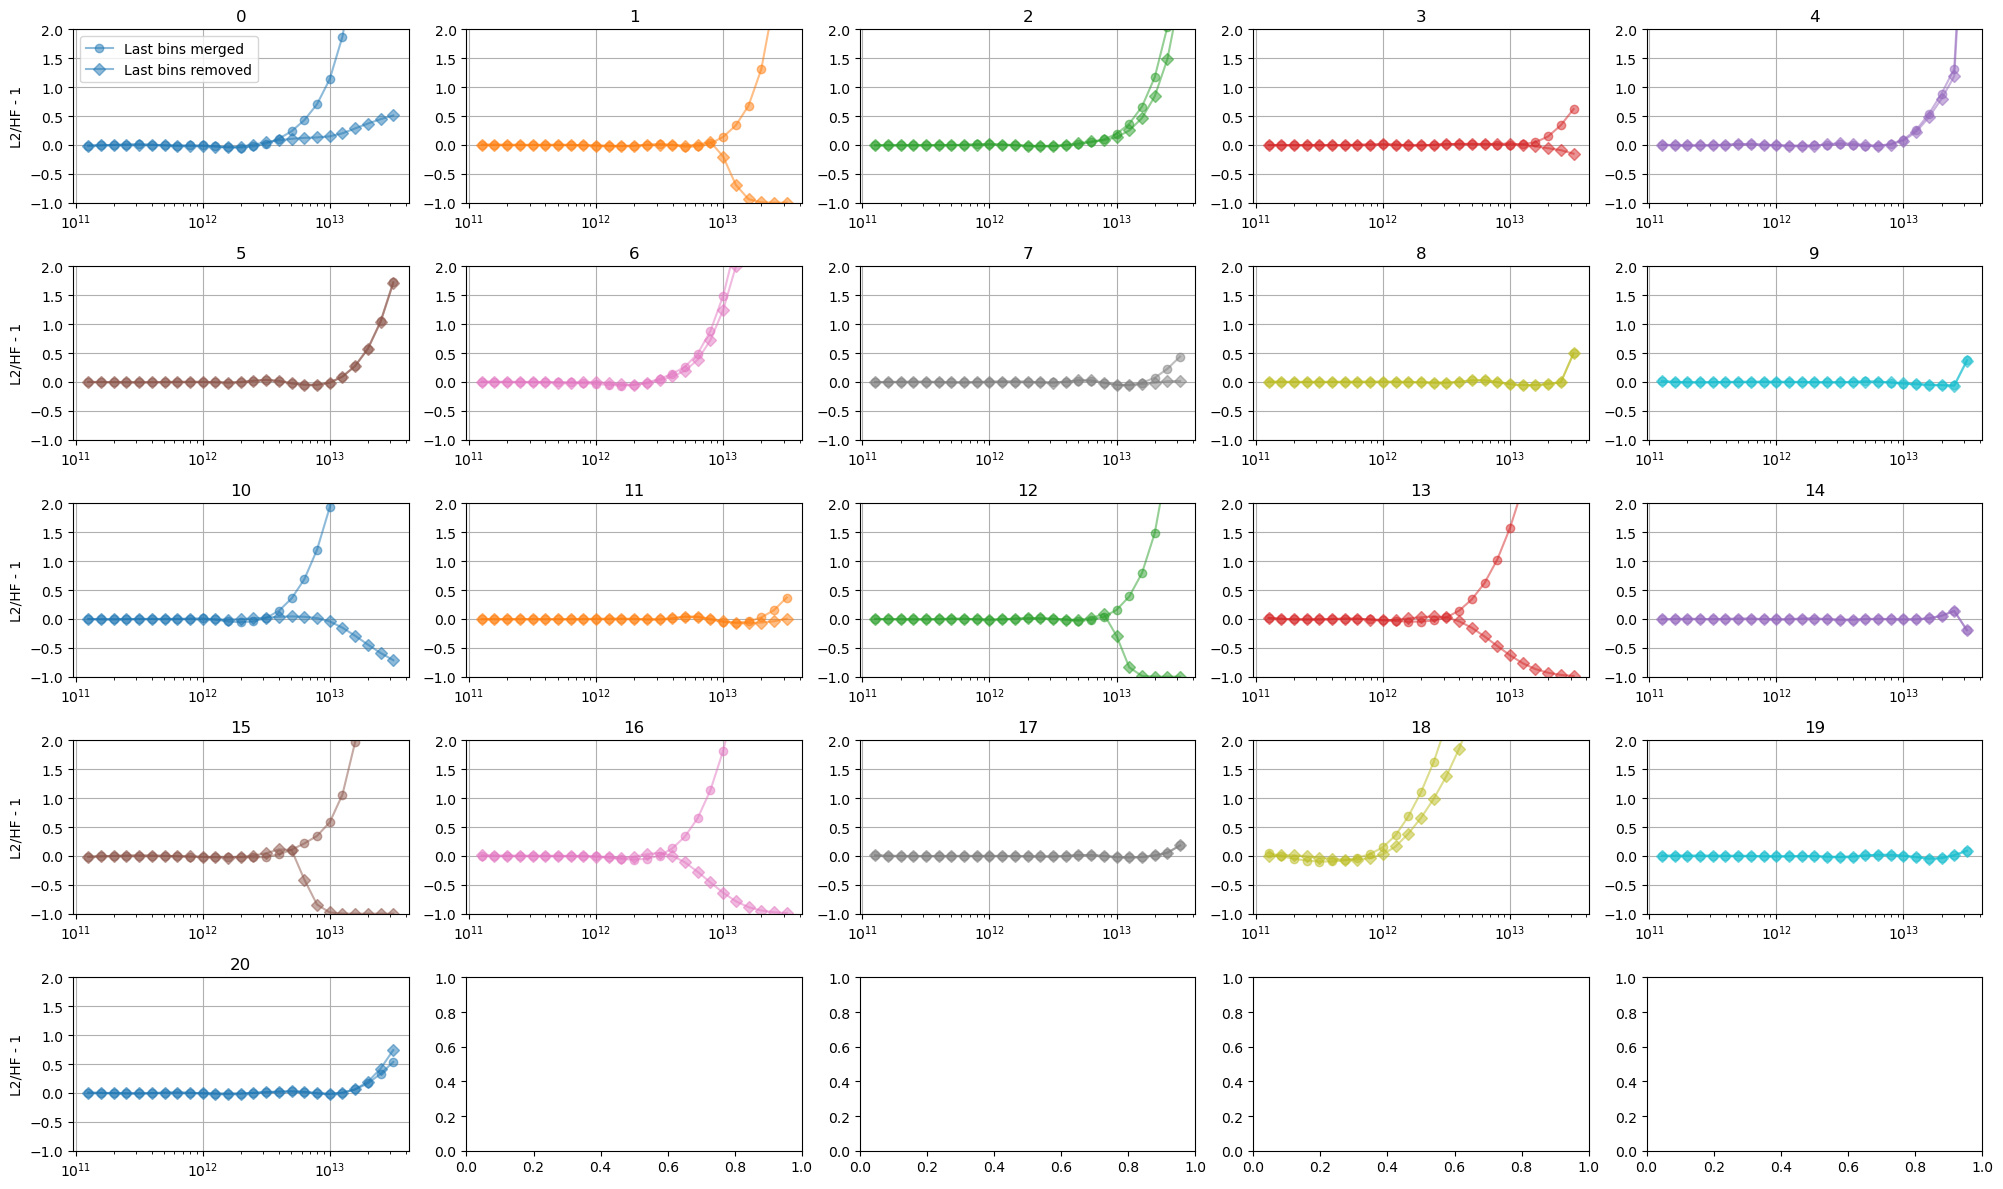

In [4]:
import numpy as np
from matplotlib import pyplot as plt
from gal_goku import plot

data_dir = '/home/qezlou/HD2/HETDEX/cosmo/data/HMF/'
plt_hmf = plot.PlotHMF(data_dir=data_dir)
x= np.arange(11.1, 13.5, 0.1)
_, _, smoothed_merged, x =plt_hmf.get_pairs(x=x,no_merge=False)
_, _, smoothed_not_merged, x =plt_hmf.get_pairs(x=x,no_merge=True)

per_panel = 1
num_sims = len(smoothed_merged['HF'])
rows, columns = plt_hmf._setup_panels(num_sims, per_panel)
fig, ax = plt.subplots(rows, columns, figsize=(20, 12))
for i in range(num_sims):
    p = np.floor(i/per_panel).astype(int)
    indx, indy = np.floor(p/columns).astype(int), p%columns
    ax[indx, indy].plot(10**x, smoothed_merged['L2'][i]/smoothed_merged['HF'][i] - 1, 'o-', color=f'C{i}', alpha=0.5, label='Last bins merged')
    ax[indx, indy].plot(10**x, smoothed_not_merged['L2'][i]/smoothed_merged['HF'][i] - 1, 'D-', color=f'C{i}', alpha=0.5, label='Last bins removed')
    ax[indx, indy].set_title(i)
    ax[indx, indy].set_ylim(-1, 2)
    ax[indx, indy].set_xscale('log')
    if p==0:
        ax[indx, indy].legend()
    if indy == 0:
        ax[indx, indy].set_ylabel('L2/HF - 1')
    ax[indx, indy].grid()
fig.tight_layout()
#ax.set_yscale('log')

## PCA:

In [1]:
import numpy as np
from gal_goku import summary_stats
data_dir = '/home/qezlou/HD2/HETDEX/cosmo/data/HMF/'
hmf = summary_stats.HMF(data_dir=data_dir, fid ='HF',  narrow=False, no_merge=False)
val, vec, y = hmf.get_pca(x=np.arange(11.1, 13.41, 0.1))

In [ ]:
vec, y[0]

(array([[ 0.19998939,  0.20140803,  0.20239457,  0.20338825,  0.20415223,
          0.20470262,  0.20517889,  0.20565657,  0.20607822,  0.20636148,
          0.20650978,  0.20656799,  0.20657657,  0.20653275,  0.20642577,
          0.20621222,  0.20583683,  0.20524734,  0.20441979,  0.20345179,
          0.20233334,  0.20108273,  0.19976625,  0.19835524],
        [-0.32132566, -0.29526648, -0.26538656, -0.23373489, -0.20634711,
         -0.18399361, -0.16160203, -0.13489298, -0.10546263, -0.07881869,
         -0.05595442, -0.03392376, -0.01009327,  0.01561896,  0.04534171,
          0.07856282,  0.11476251,  0.15351055,  0.19366433,  0.23242714,
          0.2695626 ,  0.30366268,  0.33351682,  0.35944186],
        [ 0.17013476,  0.21119569,  0.20634903,  0.16674972,  0.12291292,
          0.08018224,  0.04298127,  0.01456219, -0.01086318, -0.05979362,
         -0.13118203, -0.19973396, -0.24695102, -0.27495949, -0.27873345,
         -0.260888  , -0.22920566, -0.19000467, -0.13911783, -

## Cosmological sensitivity:

Binning the hmfs into percentiles of cosmologucal parameters:

BaseStatEmu | 02/10/2025 02:30:29 PM | Rank 0 | INFO  |  Load IC file from /home/qezlou/HD2/HETDEX/cosmo/data/HMF/all_ICs.json
BaseStatEmu | 02/10/2025 02:30:29 PM | Rank 0 | INFO  |  Load IC file from /home/qezlou/HD2/HETDEX/cosmo/data/HMF/all_ICs.json
BaseStatEmu | 02/10/2025 02:30:29 PM | Rank 0 | INFO  |  Load IC file from /home/qezlou/HD2/HETDEX/cosmo/data/HMF/all_ICs.json
BaseStatEmu | 02/10/2025 02:30:29 PM | Rank 0 | INFO  |  Load IC file from /home/qezlou/HD2/HETDEX/cosmo/data/HMF/all_ICs.json
BaseStatEmu | 02/10/2025 02:30:29 PM | Rank 0 | INFO  |  Load IC file from /home/qezlou/HD2/HETDEX/cosmo/data/HMF/all_ICs.json
BaseStatEmu | 02/10/2025 02:30:29 PM | Rank 0 | INFO  |  Load IC file from /home/qezlou/HD2/HETDEX/cosmo/data/HMF/all_ICs.json
BaseStatEmu | 02/10/2025 02:30:29 PM | Rank 0 | INFO  |  Load IC file from /home/qezlou/HD2/HETDEX/cosmo/data/HMF/all_ICs.json
BaseStatEmu | 02/10/2025 02:30:29 PM | Rank 0 | INFO  |  Load IC file from /home/qezlou/HD2/HETDEX/cosmo/data/H

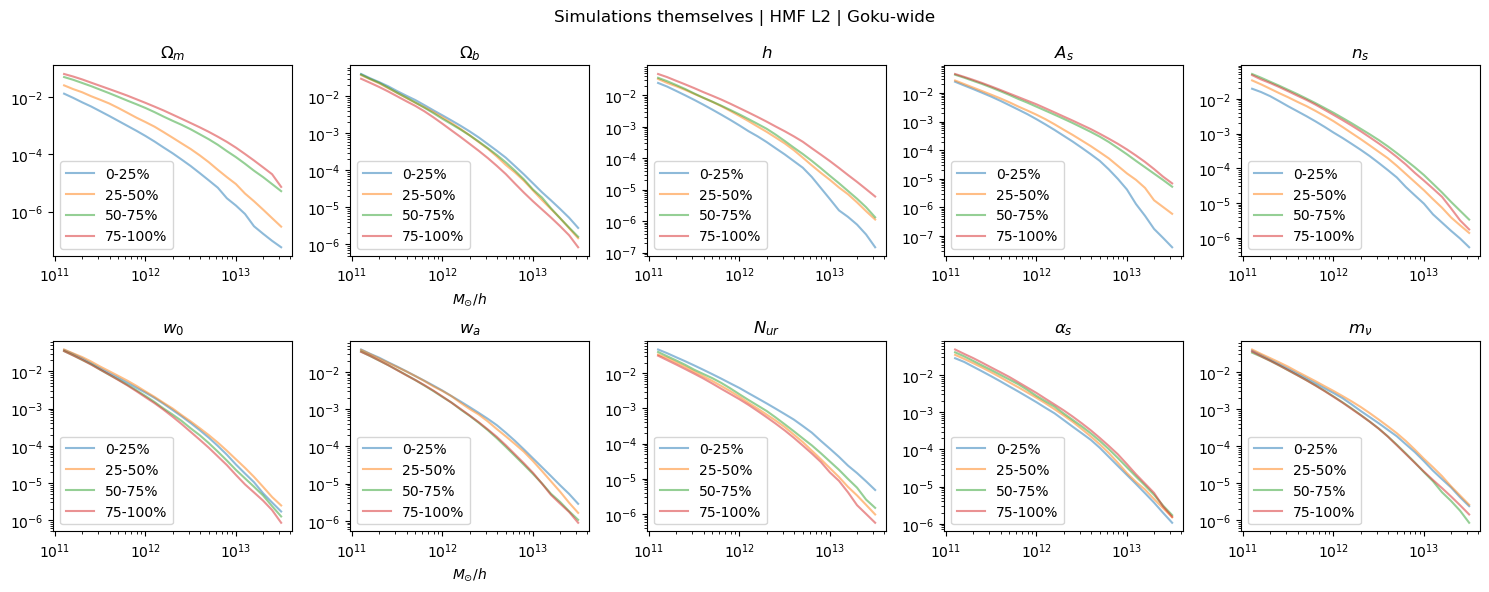

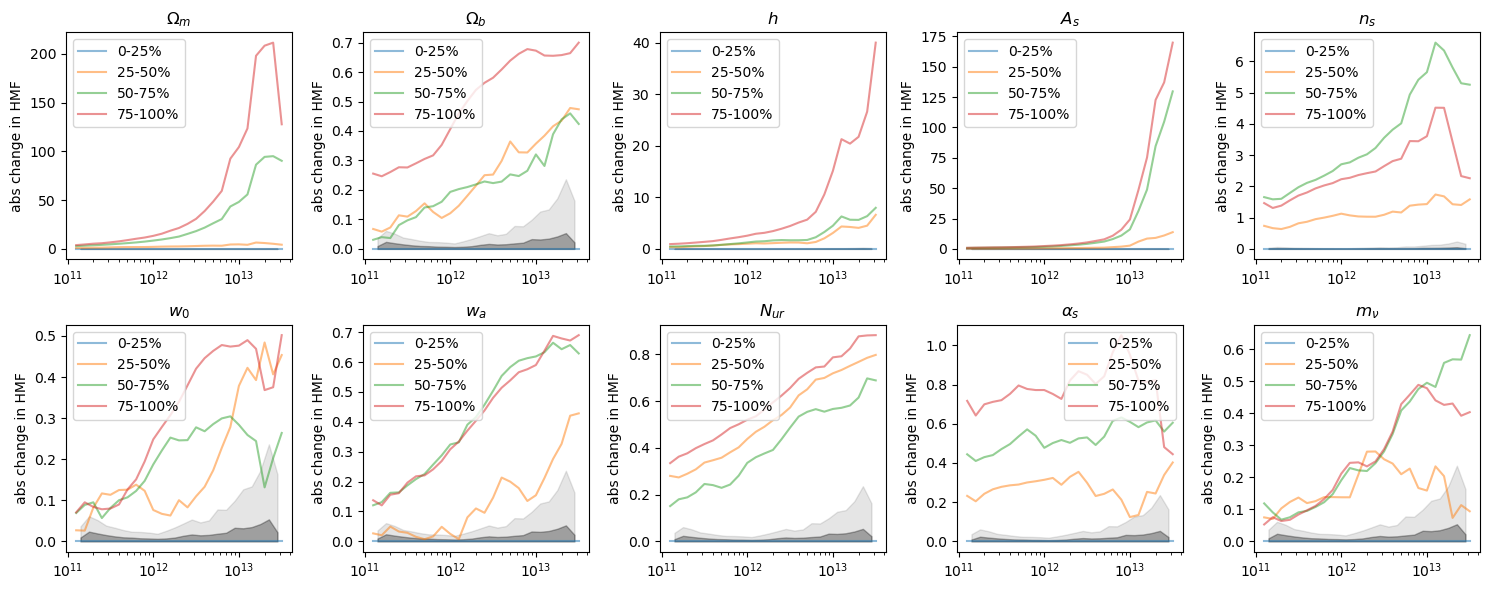

In [16]:
from gal_goku import plot
data_dir = '/home/qezlou/HD2/HETDEX/cosmo/data/HMF/'
plt_hmf = plot.PlotHMF(data_dir=data_dir, logging_level='ERROR')
plt_hmf.bin_in_param_space(data_dir=data_dir, fid='L2', narrow=False, no_merge=True)

BaseStatEmu | 02/10/2025 02:30:53 PM | Rank 0 | INFO  |  Load IC file from /home/qezlou/HD2/HETDEX/cosmo/data/HMF/all_ICs.json
BaseStatEmu | 02/10/2025 02:30:53 PM | Rank 0 | INFO  |  Load IC file from /home/qezlou/HD2/HETDEX/cosmo/data/HMF/all_ICs.json
BaseStatEmu | 02/10/2025 02:30:53 PM | Rank 0 | INFO  |  Load IC file from /home/qezlou/HD2/HETDEX/cosmo/data/HMF/all_ICs.json
BaseStatEmu | 02/10/2025 02:30:53 PM | Rank 0 | INFO  |  Load IC file from /home/qezlou/HD2/HETDEX/cosmo/data/HMF/all_ICs.json
BaseStatEmu | 02/10/2025 02:30:53 PM | Rank 0 | INFO  |  Load IC file from /home/qezlou/HD2/HETDEX/cosmo/data/HMF/all_ICs.json
BaseStatEmu | 02/10/2025 02:30:53 PM | Rank 0 | INFO  |  Load IC file from /home/qezlou/HD2/HETDEX/cosmo/data/HMF/all_ICs.json
BaseStatEmu | 02/10/2025 02:30:53 PM | Rank 0 | INFO  |  Load IC file from /home/qezlou/HD2/HETDEX/cosmo/data/HMF/all_ICs.json
BaseStatEmu | 02/10/2025 02:30:53 PM | Rank 0 | INFO  |  Load IC file from /home/qezlou/HD2/HETDEX/cosmo/data/H

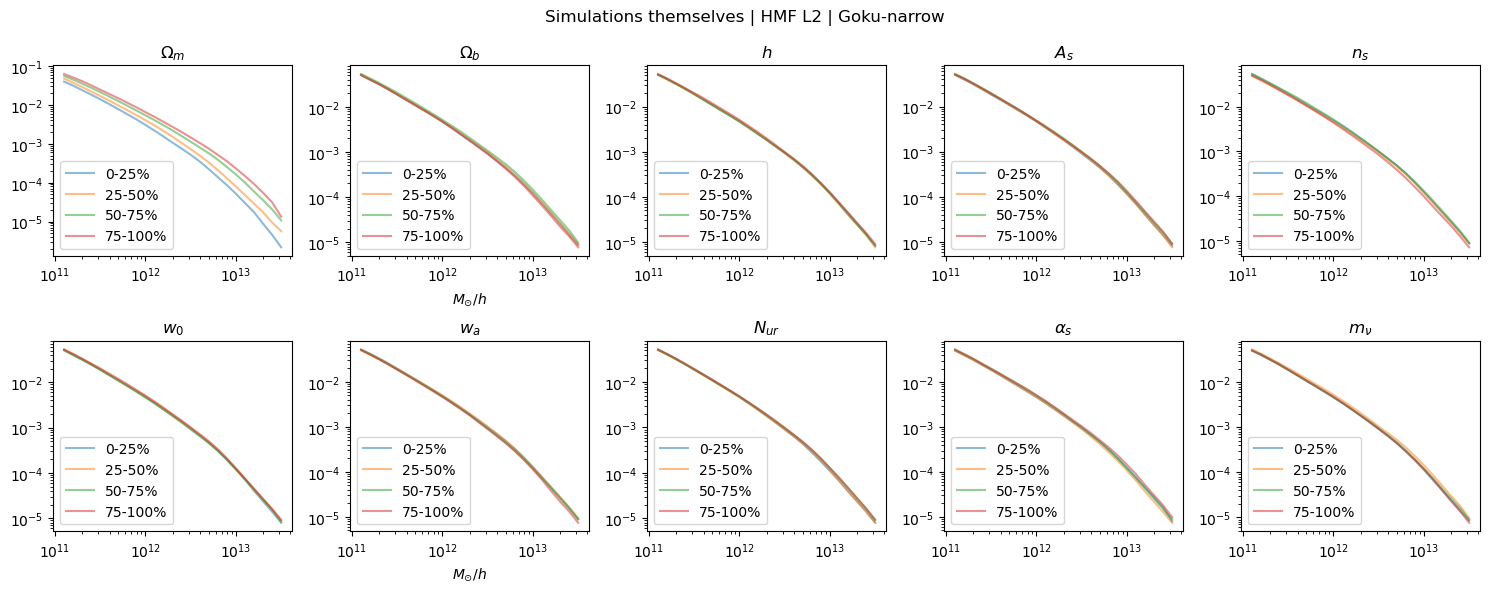

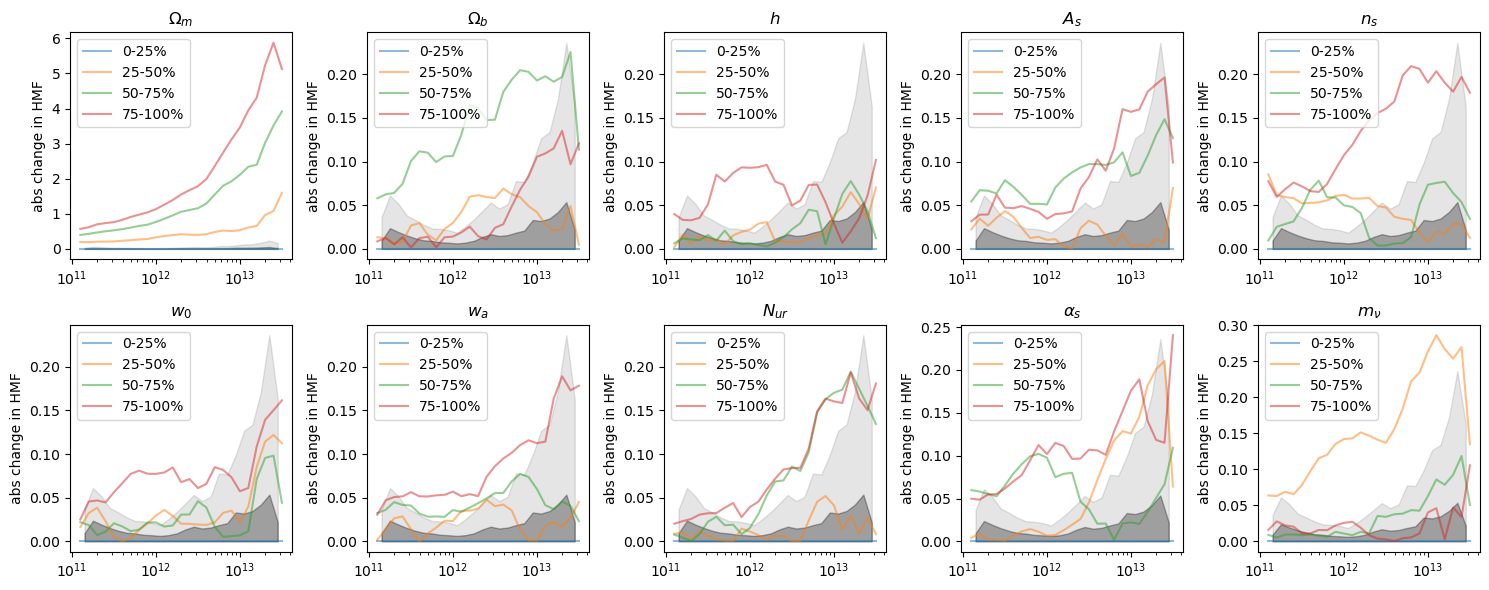

In [17]:
from gal_goku import plot
data_dir = '/home/qezlou/HD2/HETDEX/cosmo/data/HMF/'
plt_hmf = plot.PlotHMF(data_dir=data_dir, logging_level='ERROR')
plt_hmf.bin_in_param_space(data_dir=data_dir, fid='L2', narrow=True, no_merge=True)